In [1]:
from openvino.runtime import Core
import torch 
import torch.nn as nn
from diffusers import StableDiffusionPipeline
from optimum.intel.openvino import OVStableDiffusionPipeline


╭──────────────────────────────────────────────────────────────────────────────────────────────────╮
│ pip install https://github.com/huggingface/transformers                                          │
│           ▲                                                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
SyntaxError: invalid syntax

In [2]:
ie = Core()
devices = ie.available_devices
for device in devices:
    device_name = ie.get_property(device, "FULL_DEVICE_NAME")
    print(f"{device}: {device_name}")
    
prompt = "red car in snowy forest"

CPU: Intel(R) Xeon(R) Gold 6128 CPU @ 3.40GHz


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

tempo decorrrido:69.53584933280945


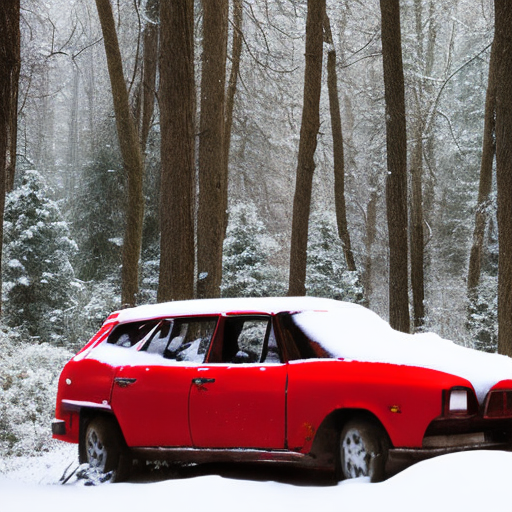

In [9]:
import time

model_id = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionPipeline.from_pretrained(model_id)
#pipe.save_pretrained("stabilityai_cpu")
st = time.time()
output_cpu = pipe(prompt, num_inference_steps=17).images[0]
#output_cpu.save("image_cpu.png")
ft = time.time()
print(f"tempo decorrrido:{ft - st}")
output_cpu

Framework not specified. Using pt to export to ONNX.
Keyword arguments {'subfolder': '', 'trust_remote_code': False} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Using framework PyTorch: 2.0.1a0+cxx11.abi
/home/u193692/.local/lib/python3.9/site-packages/transformers/models/clip/modeling_clip.py:286: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if attn_weights.size() != (bsz * self.num_heads, tgt_len, src_len):
/home/u193692/.local/lib/python3.9/site-packages/transformers/models/clip/modeling_clip.py:294: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if causal_attention_mask.size() != (bsz, 1, tgt_len, src_len):
/home/u193692/.local/lib/python3.9/site-packages/transformers/models/clip/modeling_clip.py:326: Trac

========== Diagnostic Run torch.onnx.export version 2.0.1a0+cxx11.abi ==========
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Using framework PyTorch: 2.0.1a0+cxx11.abi
/home/u193692/.local/lib/python3.9/site-packages/diffusers/models/unet_2d_condition.py:761: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if any(s % default_overall_up_factor != 0 for s in sample.shape[-2:]):
/home/u193692/.local/lib/python3.9/site-packages/diffusers/models/resnet.py:215: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert hidden_states.shape[1] == self.channels
/home/u193692/.local/lib/python3.9/site-packages/diffusers/models/resnet.py:220: TracerWarning: Converting a tensor to a Python bool

========== Diagnostic Run torch.onnx.export version 2.0.1a0+cxx11.abi ==========
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Using framework PyTorch: 2.0.1a0+cxx11.abi
/opt/intel/inteloneapi/pytorch/latest/lib/python3.9/site-packages/torch/onnx/_internal/jit_utils.py:306: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at /build/pytorch/torch/csrc/jit/passes/onnx/constant_fold.cpp:179.)
  _C._jit_pass_onnx_node_shape_type_inference(node, params_dict, opset_version)
/opt/intel/inteloneapi/pytorch/latest/lib/python3.9/site-packages/torch/onnx/utils.py:689: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at /build/pytorch/torch/csrc/jit/passes/onnx/constant_fold.cpp:179.)
  _C._jit_pass_onnx_graph_shape_type_inference(
/opt/intel/inteloneapi/pytorch/latest/lib/python3.9/site-packages/torch/onnx/utils.py:1186: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op.

========== Diagnostic Run torch.onnx.export version 2.0.1a0+cxx11.abi ==========
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

========== Diagnostic Run torch.onnx.export version 2.0.1a0+cxx11.abi ==========
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Compiling the vae_decoder...
Compiling the unet...
Compiling the vae_encoder...
Compiling the text_encoder...


  0%|          | 0/18 [00:00<?, ?it/s]

tempo decorrrido:51.50028610229492


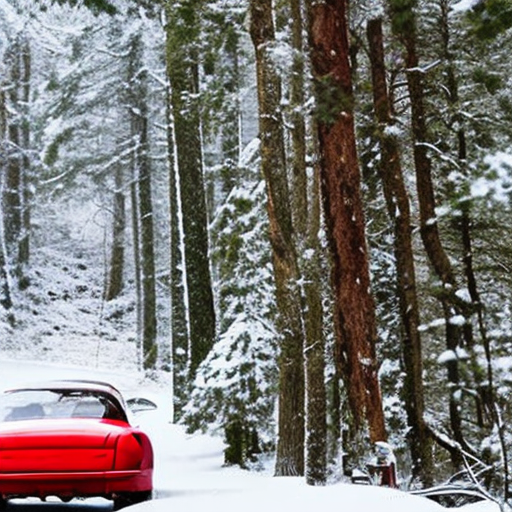

In [6]:

model_id = "stabilityai/stable-diffusion-2-1-base"
ov_pipe = OVStableDiffusionPipeline.from_pretrained(model_id, export=True, compile=False)
ov_pipe.reshape(batch_size=1, height=512, width=512, num_images_per_prompt=1)
#ov_pipe.save_pretrained("./openvino_ir")
ov_pipe.compile()
st = time.time()
output_cpu_ov = ov_pipe(prompt, num_inference_steps=17).images[0]
output_cpu_ov.save("image_ov_cpu.png")
ft = time.time()
print(f"tempo decorrrido:{ft - st}")
output_cpu_ov

In [8]:
ov_pipe.to("GPU")
ov_pipe.compile()

Compiling the vae_decoder...


RuntimeError: Check 'false' failed at src/inference/src/core.cpp:114:
Check '!device_map.empty()' failed at src/plugins/intel_gpu/src/plugin/plugin.cpp:539:
[GPU] Can't get DEVICE_ID property as no supported devices found or an error happened during devices query.
[GPU] Please check OpenVINO documentation for GPU drivers setup guide.




In [7]:
st = time.time()
output_gpu_ov = ov_pipe(prompt, num_inference_steps=17).images[0]
output_gpu_ov.save("image_ov_gpu.png")
ft = time.time()
print(f"tempo decorrrido:{ft - st}")
output_gpu_ov

  0%|          | 0/18 [00:00<?, ?it/s]

KeyboardInterrupt: 